In [2]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
with open('./processed_song.json', 'r', encoding='UTF8') as f:
    data = json.load(f)
df = pd.json_normalize(data)

In [4]:
df = df[df['count'] > 0]
df

,id,song_name,artist_name_basket,tags,count
0,144663,밤편지,[아이유],"[감성, 발라드, 새벽, 밤, 인디, 비오는날, 슬픔, 새벽감성, 여름밤, 감성발라...",2175
1,116573,안아줘,[정준일],"[발라드, 이별, 새벽, 감성, 밤, 슬픔, 힐링, 기분전환, 가을, 카페, 비오는...",2121
2,357367,비,[폴킴],"[감성, 발라드, 비오는날, 이별, 새벽, 사랑, 비, 휴식, 밤, 힐링, 센치, ...",1981
3,366786,가끔 미치도록 네가 안고 싶어질 때가 있어,[가을방학],"[새벽, 인디, 밤, 감성, 발라드, 힐링, 추억, 기분전환, 카페, 비오는날, 인...",1919
4,133143,"그대와 나, 설레임 (Feat. 소울맨)",[어쿠스틱 콜라보],"[기분전환, 힐링, 카페, 발라드, 감성, 새벽, 밤, 기분좋은, 인디음악, 설레임...",1633
...,...,...,...,...,...
74254,269143,별이 되어줘,[네미시스],"[밴드, 새벽, 잔잔한, 몽환적, 한국, 얼터너티브, 인디]",1
74255,414795,Till The Night There,[안다영],"[잔잔한, 밤, 새벽]",1
74256,262640,이별을 말하다,[남영우],"[노래, 신곡, 1월]",1
74257,268471,그래서,[리마크],[발라드],1


In [5]:
# 태그들의 리스트, K-means clustering을 위한 input 값
content = []
for idx, row in df.iterrows():
    content.append(' '.join(row.tags))

In [6]:
len(content)

74259

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


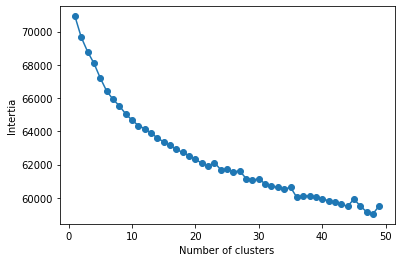

In [7]:
# Elbow Method for selecting optimal K
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(content)

inertia = []
for i in range(1, 50):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(X)
    inertia.append(kmeans_plus.inertia_)
    print(i)

plt.plot(range(1, 50), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

In [ ]:
# Silhouette Method for selecting optimal k
from sklearn.metrics import silhouette_samples
import numpy as np
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(content)

silhouette_vals = []
for i in range(1, 200):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    pred = kmeans_plus.fit_predict(X)
    silhouette_vals.append(np.mean(silhouette_samples(X, pred, metric='euclidean')))

plt.plot(range(1, 200), silhouette_vals, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [22]:
n_clusters = 30
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(content)

kmeans = KMeans(n_clusters=n_clusters).fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_
df['labels'] = labels

In [ ]:
df